In [1]:
from lab1_proto import *
from lab1_tools import *
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import mixture
from scipy.cluster.hierarchy import dendrogram, linkage

## Load data

In [2]:
data = np.load('lab1_data.npz',allow_pickle=True)['data']
example = np.load('lab1_example.npz',allow_pickle=True)['example'].item()
samples = example['samples']
samplingrate = int(example['samplingrate']/1000)  #sampling per millisecond
winlen = 20*samplingrate
winshift = 10*samplingrate

## Exract mfcc features

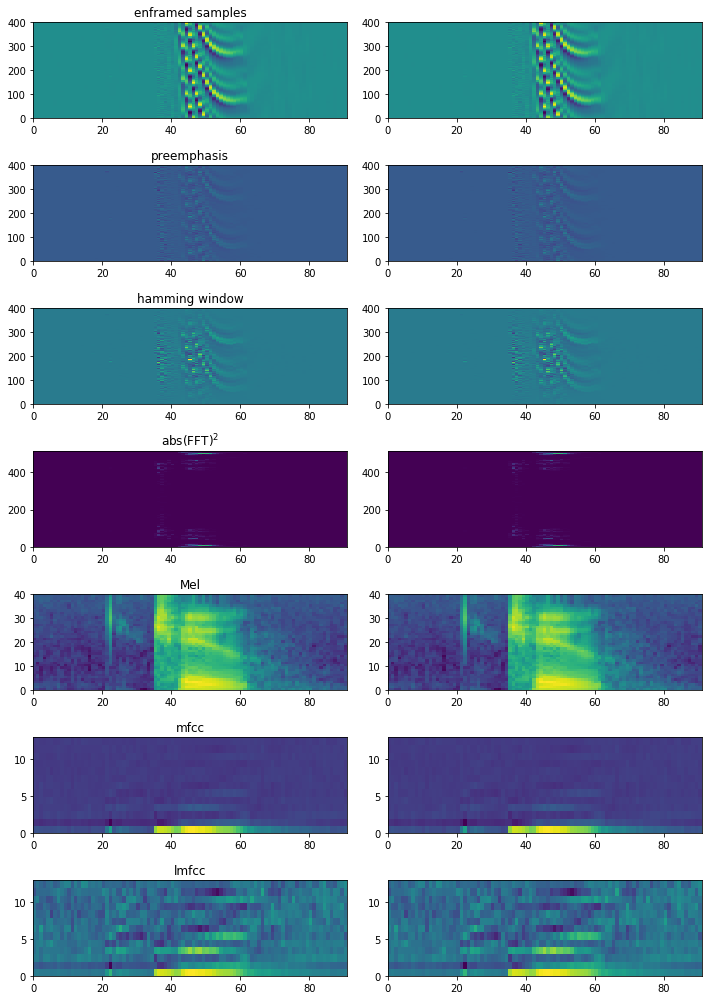

In [3]:
t=7
fig, ax = plt.subplots(nrows=t,ncols=2,figsize=(t+3,t*2))
emph = enframe(samples,winlen,winshift)  
ax[0][0].pcolormesh(emph.T)
ax[0][0].set_title('enframed samples')
ax[0][1].pcolormesh(example['frames'].T)

preemp_emph = preemp(emph)
ax[1][0].pcolormesh(preemp_emph.T)
ax[1][0].set_title('preemphasis')
ax[1][1].pcolormesh(example['preemph'].T)

windows = windowing(preemp_emph)
ax[2][0].pcolormesh(windows.T)
ax[2][0].set_title('hamming window')
ax[2][1].pcolormesh(example['windowed'].T)

pSpec = powerSpectrum(windows,512)
ax[3][0].pcolormesh(pSpec.T)
ax[3][0].set_title('abs(FFT)$^2$')
ax[3][1].pcolormesh(example['spec'].T)

melSpec = logMelSpectrum(pSpec,20000)
ax[4][0].pcolor(melSpec.T)
ax[4][0].set_title('Mel')
ax[4][1].pcolormesh(example['mspec'].T)

cStrum = cepstrum(melSpec,13)
ax[5][0].pcolormesh(cStrum.T)
ax[5][0].set_title('mfcc')
ax[5][1].pcolormesh(example['mfcc'].T)

ax[6][0].pcolormesh(lab1tools.lifter(cStrum).T)
ax[6][0].set_title('lmfcc')
ax[6][1].pcolormesh(example['lmfcc'].T)

fig.tight_layout()
plt.show()

## compute correlations

In [3]:
#feature correlation
mfccFeatures = mfcc(data[0]['samples'])
mspecFeatures = mspec(data[0]['samples'])

for i in range(1,len(data)):
    mfccFeatures = np.vstack((mfccFeatures,mfcc(data[i]['samples'])))
    mspecFeatures = np.vstack((mspecFeatures,mspec(data[i]['samples'])))

mfccCorr = np.corrcoef(mfccFeatures.T)
plt.title("MFCC Features correlations")
plt.pcolormesh(mfccCorr)
plt.show()


mspecCorr = np.corrcoef(mspecFeatures.T)
plt.title("MSPEC Features correlations")
plt.pcolormesh(mspecCorr)
plt.show()



NameError: name 'mfcc' is not defined

## Train GMMs

In [5]:
n_components = [4,8,16,32]
models=[]
for i in n_components:
    model = mixture.GaussianMixture(i,covariance_type='diag')
    model.fit(mfccFeatures)
    models.append(model)

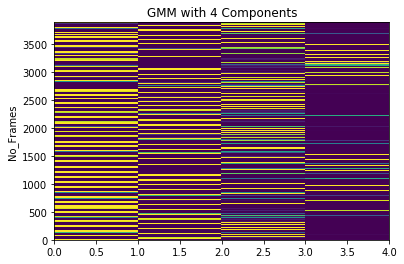

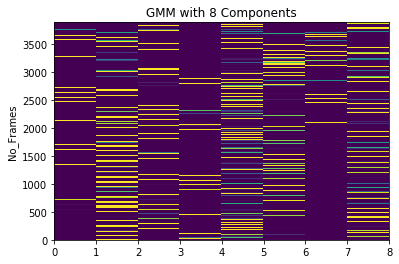

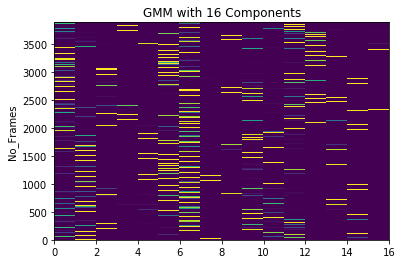

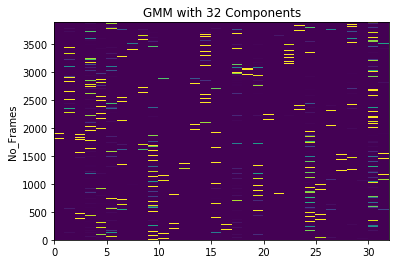

In [6]:
for i in range(4): 
    poster=models[i].predict_proba(mfccFeatures) 
    plt.ylabel('No_Frames') 
    plt.title("GMM with %d Components"%n_components[i]) 
    plt.pcolormesh(poster) 
    plt.show()

plot and discuss the GMM posteriors for the model with 32 components for the four occurrences of the word “seven” (utterances 16, 17, 38, and 39).

In [2]:
utterances_index = [16, 17, 38, 39]
for i in utterances_index:
    plt.title('Time signal for sample [%d] gender:%s id:%s'%(i,data[i]['gender'],data[i]['speaker']))
    plt.plot(data[i]['samples'])
    plt.show()

NameError: name 'plt' is not defined

In [ ]:

for i in utterances_index:
    Seven_Mfcc_Features = mfcc(data[i]['samples'])
    poster=models[3].predict_proba(Seven_Mfcc_Features)
    plt.title('posterior of the %dth sample'%i)
    plt.pcolormesh(poster)
    plt.show()

In [1]:
for i in range(1,5):
    print(h%s = net.get('h%s')%(i,i))

SyntaxError: keyword can't be an expression (<ipython-input-1-40b39f12c5df>, line 2)

## global distance

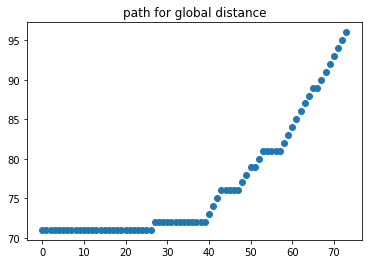

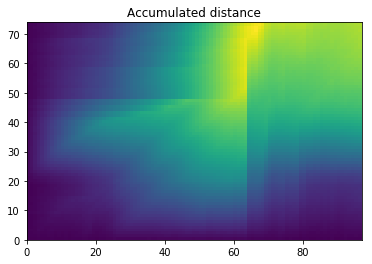

In [7]:
sample1=mfcc(data[1]['samples'])
sample2=mfcc(data[2]['samples'])
d,LD,AD,path=dtw(sample1,sample2)
plt.scatter(path[:,0],path[:,1])
plt.title('path for global distance')
plt.show()
plt.pcolormesh(AD)
plt.title('Accumulated distance')
plt.show()

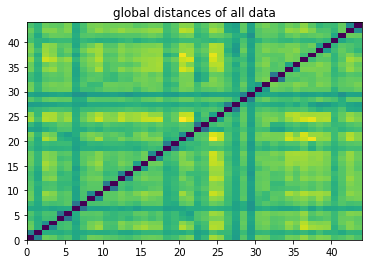

In [9]:
N = len(data)
GD = np.array([dtw(mfcc(data[i]['samples']),mfcc(data[j]['samples']),flag=True) for j in range(N) for i in range(N)]).reshape((N,N))
plt.title('global distances of all data')
plt.pcolormesh(GD)
plt.show()

C:\Users\XC\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


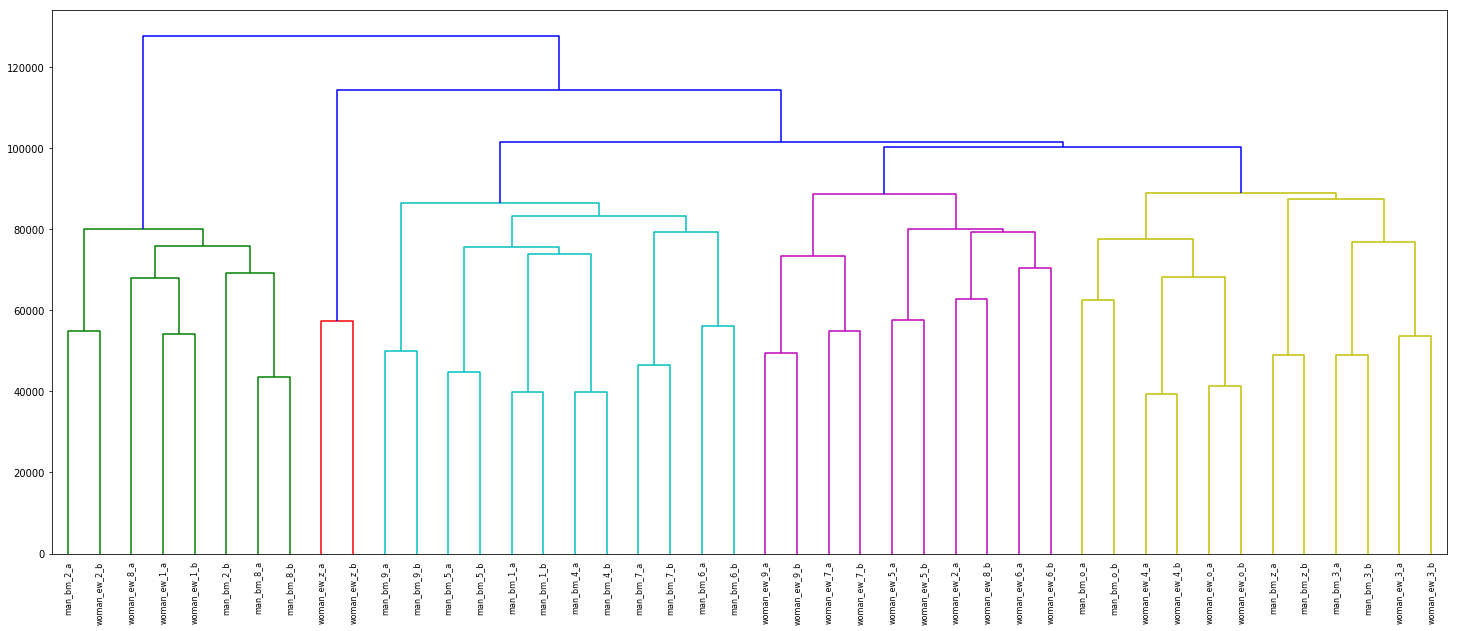

In [10]:
Z=linkage(GD, method='complete')
plt.figure(figsize=(25, 10))
dendrogram(Z,labels=tidigit2labels(data))
plt.show()